# Explore here

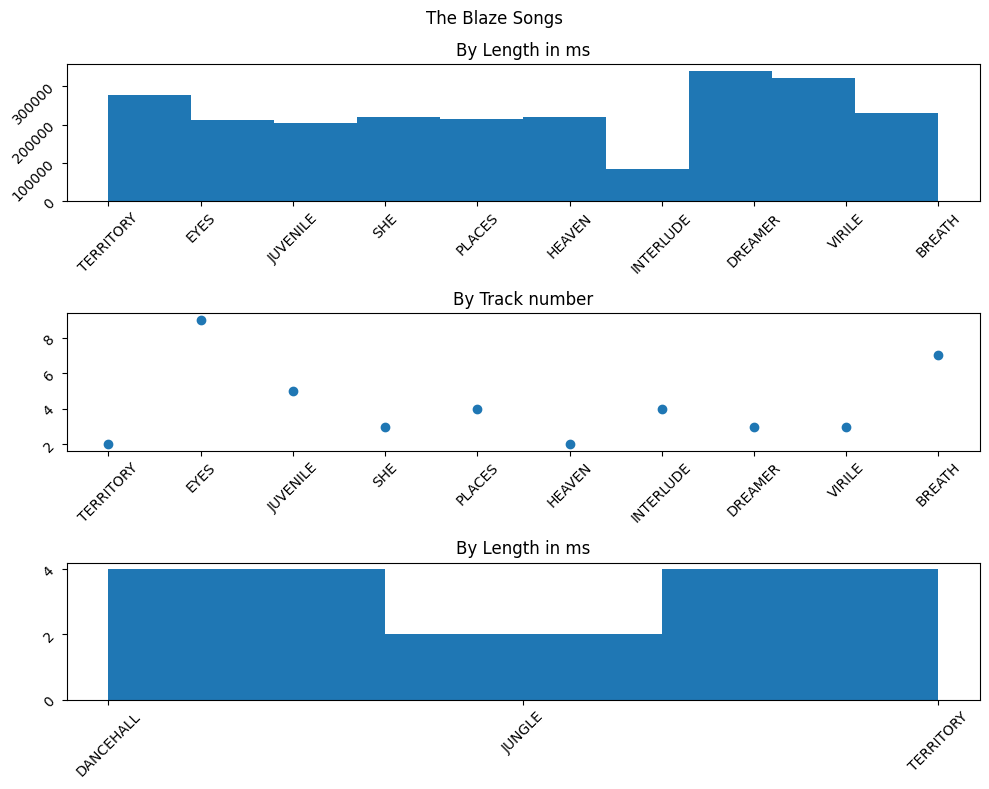

In [58]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

the_blaze_uri = 'spotify:artist:1Dt1UKLtrJIW1xxRBejjos'
spotify = spotipy.Spotify(
    client_credentials_manager=SpotifyClientCredentials(
        client_id,
        client_secret
        )
    )

results = spotify.artist_top_tracks(the_blaze_uri)

top_tracks = pd.DataFrame(results['tracks'])
top_tracks_albums = pd.DataFrame(list(top_tracks['album']))
top_tracks_albums.columns += '_album'
top_tracks = pd.concat([top_tracks, top_tracks_albums], axis=1)

# Fig 1
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('The Blaze Songs')

axs[0].hist(top_tracks['name'], weights=top_tracks['duration_ms'], bins=len(top_tracks), align='mid')
axs[0].tick_params(labelrotation=45)
axs[0].set_title("By Length in ms")

# Fig 2
axs[1].scatter(top_tracks['name'], top_tracks['track_number'])
axs[1].tick_params(labelrotation=45)
axs[1].set_title("By Track number")

# Fig 3
album_count = top_tracks.groupby(['name_album']).aggregate('size')
axs[2].hist(album_count.keys(), weights=album_count.values, bins=len(album_count.keys()), align='mid')
axs[2].tick_params(labelrotation=45)
axs[2].set_title("By Length in ms")


plt.tight_layout()
plt.show()

### Analisys:
By looking at the data, it seems the least popular album is Jungle. The length of the most popular songs is mostly similar. The most popular tracks seem to usually be the first 4 from each album, which could mean the artists put their best songs at the top of the albums. 